In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [1]:
!pip install ultralytics
!pip install gdown  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 9.3 MB/s eta 0:00:00


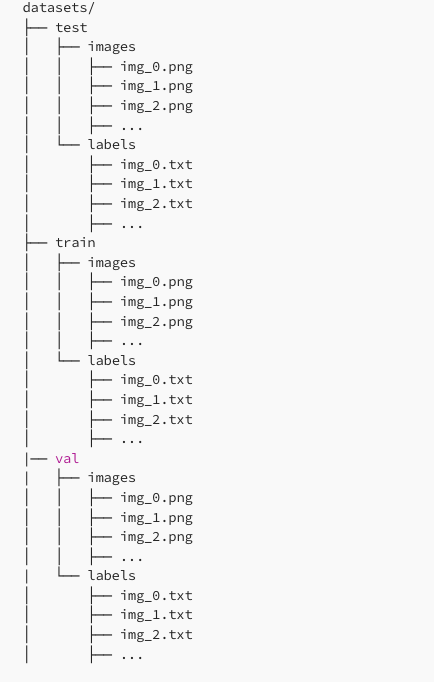

In [ ]:
import gdown
import zipfile
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
import supervision as sv

Dataset_name = "Can"


if Dataset_name == "Can":
    # # same as the above, but with the file ID
     id = "1V-Lr_FQaysX9tlu29MQAQkeBIveDhiC6"
     zip_output = "datasets.zip"

    

# Download the file from `url` and save it locally 
if not os.path.isdir( zip_output.split(".")[0] ):
    gdown.download(id=id, output= zip_output, quiet=False)
    with zipfile.ZipFile(zip_output, 'r') as zip_ref:
        zip_ref.extractall('.')
    
    # delete zip file
    os.remove(zip_output)    

In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

results = model.train(
        batch=8,
        device="cpu",
        data="dataset.yaml",
        epochs=7,
        imgsz=120,
    )

Ultralytics YOLOv8.0.84 🚀 Python-3.8.16 torch-2.0.0 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=dataset.yaml, epochs=7, patience=50, batch=8, imgsz=120, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nm